<a href="https://colab.research.google.com/github/IA2021UR/trabajo-ia-en-la-comunidad-de-la-rioja-equipo-2/blob/main/AlineaImagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils

In [28]:
!unzip imagenesPrueba.zip

Archive:  imagenesPrueba.zip
   creating: BRIEVA_DE_CAMEROS_01_26032A00100002/
  inflating: BRIEVA_DE_CAMEROS_01_26032A00100002/BRIEVA_DE_CAMEROS_01_26032A00100002_page-0002.jpg  
  inflating: BRIEVA_DE_CAMEROS_01_26032A00100002/BRIEVA_DE_CAMEROS_01_26032A00100002_page-0001.jpg  
   creating: PREJANO-ANTIGUAS--Fondo-Archivo_Prejano-P-4_26119A00400004/
  inflating: PREJANO-ANTIGUAS--Fondo-Archivo_Prejano-P-4_26119A00400004/PREJANO-(ANTIGUAS- Fondo Archivo)_Prejano P-4_26119A00400004_page-0002.jpg  
  inflating: PREJANO-ANTIGUAS--Fondo-Archivo_Prejano-P-4_26119A00400004/PREJANO-(ANTIGUAS- Fondo Archivo)_Prejano P-4_26119A00400004_page-0001.jpg  


In [38]:
bparte1=cv2.imread("BRIEVA/BPARTE1.jpg")
pparte1=cv2.imread("PREJANO/PPARTE1.jpg")

In [31]:
def mostrarImagen(image):
    if len(image.shape)==3:
        img2 = image[:,:,::-1]
        plt.imshow(img2)
        plt.show()
    else:
        img2 = image
        plt.imshow(img2,cmap='gray')
        plt.show()

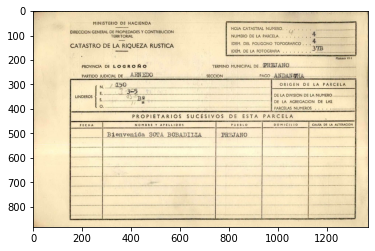

In [40]:
mostrarImagen(pparte1)

In [46]:
def alinea_imagenes(imagen1,template,maxFeatures=500,keepPercent=0.2,debug=False):
  imageGray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  templateGray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

  orb=cv2.ORB_create(maxFeatures)
  (kpsA,descsA)=orb.detectAndCompute(imageGray,None)
  (kpsB,descsB)=orb.detectAndCompute(templateGray,None)

  method = cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING
  matcher = cv2.DescriptorMatcher_create(method)
  matches = matcher.match(descsA, descsB, None)

  matches = sorted(matches, key=lambda x:x.distance)
  keep = int(len(matches) * keepPercent)
  matches = matches[:keep]

  if debug:
    matchedVis=cv2.drawMatches(image,kpsA,template,kpsB,matches,None)
    matchedVis= imutils.resize(matchedVis,width=1000)
    cv2.waitKey(0)

  ptsA=np.zeros((len(matches),2),dtype="float")
  ptsB=np.zeros((len(matches),2),dtype="float")

  for(i,m) in enumerate(matches):
    ptsA[i]=kpsA[m.queryIdx].pt
    ptsB[i]=kpsA[m.trainIdx].pt

  (H,mask)=cv2.findHomography(ptsA,ptsB,method=cv2.RANSAC)

  (h,w)=template.shape[:2]
  aligned=cv2.warpPerspective(image,H,(w,h))

  return aligned

In [47]:
alineada=alinea_imagenes(pparte1,bparte1,debug=True)

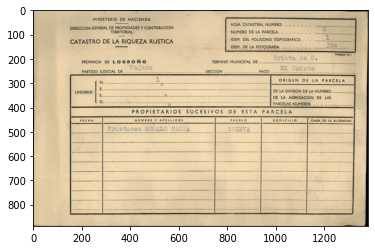

In [48]:
mostrarImagen(alineada)

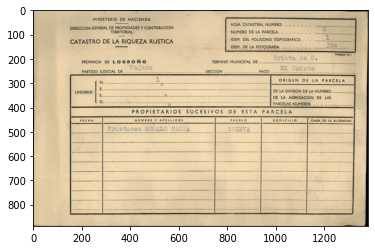

In [50]:
mostrarImagen(bparte1)